In [79]:
# %load vol.py
import os, pandas as pd
from matplotlib import pyplot as plt
#Begin delta, ending delta space, step, .dat file number
bdelta = 5
edelta = 95
steparoo = 5
fpathnum = 64
fpath = 'quotedata '+'('+str(fpathnum)+')'+'.dat'
fapth2 = fpath


os.chdir("C:/Users/vaggarwal/Downloads")
a = pd.read_csv(fpath, header = 2)

stkname = a.iloc[1,1][0:(len([(letterz in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ')) for letterz in a.iloc[1,1]][0:4]))]
dframe = pd.DataFrame(data = a)
dates = dframe.iloc[:,0].unique()
dfilter = dates

######################################################################## Comment below out for weeklies
dfilter = []
for x in dates:
    if x[3] == '0':
        dayz = int(x[4])
    else:
        dayz = int(x[3:5])
    if (dayz >=15) & (dayz <=21):
        dfilter.append(x)
dates = dfilter
# ########################################################################### Comment ^ out for weeklies

[(x,y) for x, y in enumerate(list(a))]
dframe2 = dframe.iloc[:, [0, 7, 8, 11, 18, 19 ]  ] 



compendium = {}
filtered = {}

for date in dates:
    compendium[date] = dframe2[(dframe2.iloc[:,0]== date)]
for date in compendium:
    delta =[]
    ivs = []
    for x,y in enumerate(compendium[date].iloc[:,0]):
        if compendium[date].iloc[x, 2] <0.5:
            delta.append(abs(compendium[date].iloc[x, -1]))
            ivs.append(abs(compendium[date].iloc[x, -2]))
        else:
            delta.append(1-(compendium[date].iloc[x, 2]))
            ivs.append(abs(compendium[date].iloc[x, 1]))
            
#comparisonframe = pd.DataFrame(index = [10, 25, 30, 40, 50, 60, 70, 75, 90], columns = dates)
drange = [x for x in range(bdelta, edelta, steparoo)]
comparisonframe = pd.DataFrame(index = drange, columns = dates)




for date in compendium:
    temp = compendium[date]
    for deltas in comparisonframe.index.values:
        if deltas<=50:
            try:
                ind = abs(abs(temp.iloc[:,-1])-(deltas/100)).idxmin() - temp.index.values.min()


                abvd = abs(temp.iloc[ind+1,-1]) 
                beld = abs(temp.iloc[ind-1,-1]) 
                indd = abs(temp.iloc[ind,-1])

                indv = abs(temp.iloc[ind+0, -2])
                abvv = abs(temp.iloc[ind+1, -2])
                belv = abs(temp.iloc[ind-1, -2])

                diff = abs(temp.iloc[ind, -1]) - deltas/100
                
                    


                if abs(temp.iloc[ind, -1]) >= deltas/100:
                    deltadiff = indd-beld
                    distance = (indd-(deltas/100))
                    frac = distance/deltadiff
                    ivs = indv + (belv-indv)*frac
                    comparisonframe.loc[deltas, date] = ivs

                        
                else:
                    deltadiff = abvd-indd
                    distance = ((deltas/100)-indd)
                    frac =  distance/deltadiff
                    ivs = indv - (indv-abvv)*frac
                    comparisonframe.loc[deltas, date] = ivs
                    if deltas == 5 and date == '06/19/2020':
                        print(date, deltadiff, distance, frac, abvv, indv, ivs ) 
            except:
                pass
        else:
            try:
                ind = abs(abs(1-temp.iloc[:,2])-(deltas/100)).idxmin() - temp.index.values.min()


                abvd = abs(abs(temp.iloc[ind+1,2]) )
                beld = abs(abs(temp.iloc[ind-1,2]) )
                indd = abs(abs(temp.iloc[ind,2]) )

                indv = abs(temp.iloc[ind+0, 1])
                abvv = abs(temp.iloc[ind+1, 1])
                belv = abs(temp.iloc[ind-1, 1])

                diff = abs(temp.iloc[ind, 2]) - (100-deltas)/100
                #print(date, ind, indd, indv, deltas)
                #print(temp)

                if abs(temp.iloc[ind, 2]) <= deltas/100:
                    deltadiff = indd-beld
                    distance = (indd-(deltas/100))/100
                    frac = distance/deltadiff
                    ivs = indv + (belv-indv)*frac
                    comparisonframe.loc[deltas, date] = ivs
                else:
                    deltadiff = abvd-indd
                    distance = ((deltas/100)-indd)/100
                    frac =  distance/deltadiff
                    ivs = indv - (indv-abvv)*frac
                    comparisonframe.loc[deltas, date] = ivs
            except:
                pass
                
#cols = [0,1,2,3,4,6,7,8,9,10,11,12,14]
#cols = [0,1,2,4,5]
cols = []
comparisonframe = comparisonframe.drop(comparisonframe.columns[cols], axis = 1)               
averages =  pd.DataFrame(index =comparisonframe.index.values)               
for deltas in comparisonframe.index.values:
    avg= sum(comparisonframe.loc[deltas,:])/len(comparisonframe.loc[deltas,:])
    averages.loc[deltas, 'Average'] = avg
    
    
diffys = comparisonframe.copy(deep = True)  
 
for dates in diffys.columns.values:
    for deltas in diffys.index.values:
        diffys.loc[deltas, dates] = round(float((diffys.loc[deltas, dates] - averages.loc[deltas].values)/averages.loc[deltas].values),3)*100
        
            
        
#comparisonframe.plot(figsize = (10, 5))


#plt.plot(comparisonframe, label = dates)     
#plt.ylabel('vol')
#plt.xlabel('delta space') 
#plt.figure(figsize = (20, 10)) 


         

#cols = [1,2,4,5,7]
#comp = comparisonframe.drop(comparisonframe.columns[cols], axis = 1)

#comparisonframe = comparisonframe.loc[:, filtered]

#
#comp.plot(figsize = (20,10))
#
#[(i, j) for i, j in enumerate(comparisonframe.columns.values)]




06/19/2020 0.007800000000000001 0.0013000000000000025 0.16666666666666696 0.2713 0.2768 0.2758833333333333


In [80]:
diffys
comparisonframe
# temp.index.values.min()
# temp
#comparisonframe.iloc[:,[0,1,2,3,4,5,6,7,8,16,18,19,20]]


,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
5,0.229128,0.241462,0.255842,0.261779,0.269159,0.276562,0.275295,0.279288,0.275883,0.273074,0.270548,0.267262,0.266169,0.262978,0.261238,0.259505
10,0.210123,0.221978,0.23454,0.239746,0.246037,0.253256,0.25096,0.25483,0.251717,0.250496,0.248976,0.246025,0.245582,0.243222,0.241422,0.240148
15,0.198178,0.209009,0.221727,0.224878,0.231063,0.237135,0.234516,0.237974,0.235481,0.234557,0.233809,0.231468,0.230909,0.229074,0.227609,0.226769
20,0.187762,0.198247,0.211178,0.213353,0.218426,0.224169,0.221146,0.224394,0.222403,0.221736,0.221255,0.219342,0.219079,0.217544,0.216288,0.215542
25,0.178935,0.189085,0.201784,0.202792,0.207365,0.212607,0.209521,0.212541,0.210946,0.210562,0.210497,0.208728,0.208678,0.207486,0.206576,0.20603
30,0.1711,0.180384,0.192991,0.193141,0.197246,0.20201,0.198916,0.201596,0.2006,0.2004,0.200427,0.19914,0.199181,0.19839,0.197711,0.197491
35,0.163645,0.17261,0.185071,0.183791,0.18787,0.192411,0.18928,0.191633,0.190751,0.191082,0.191267,0.190011,0.190392,0.190014,0.189645,0.189774
40,0.15671,0.165043,0.17769,0.175465,0.17898,0.183467,0.180361,0.182291,0.182065,0.182142,0.18267,0.18161,0.182259,0.18219,0.182038,0.182504
45,0.149791,0.1582,0.170827,0.16744,0.170854,0.175306,0.172051,0.173654,0.173383,0.173879,0.174563,0.173951,0.174513,0.174982,0.175085,0.175643
50,0.143865,0.151444,0.164799,0.159951,0.163249,0.167672,0.164428,0.165891,0.1657,0.166051,0.16696,0.166444,0.167346,0.168004,0.168502,0.169215


In [81]:
comparisonframe

nodes = comparisonframe.copy(deep = True)

In [82]:
import datetime as dt
for x in comparisonframe.columns:
    for y in comparisonframe.index:
        nodes.loc[y,x] = (comparisonframe.loc[y, x]/ comparisonframe.loc[50, x] ) 

        
forwardvol = pd.DataFrame( index = ['Volatility','Days', 'Years', 'Forward Vol'], columns = dfilter)
forwardvol.iloc[0,:] = comparisonframe.loc[50]

for place, date in enumerate(forwardvol.columns):
    forwardvol.iloc[1, place] = (dt.datetime.strptime(dfilter[place], "%m/%d/%Y") -dt.datetime.today()).days+1
    forwardvol.iloc[2] = forwardvol.iloc[1]/365
for place, date in enumerate(forwardvol.columns):
    try:
        forwardvol.iloc[3, place+1] = ((
            (
           (forwardvol.iloc[0, place+1]**2)*(forwardvol.iloc[2,place+1])
            )
            -
            (
            (forwardvol.iloc[0, place]**2)*(forwardvol.iloc[2,place])
            )
            
            
        )/(forwardvol.iloc[2,place+1]-forwardvol.iloc[2,place])
        )**.5
    except IndexError:
        break


forwards = forwardvol.drop(forwardvol.index[[0,1,2]])


forwardvol

nodes



,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
5,1.59266,1.5944,1.55245,1.63662,1.64876,1.64943,1.67426,1.68356,1.66496,1.64452,1.62044,1.60572,1.59053,1.56531,1.55036,1.53358
10,1.46056,1.46574,1.42319,1.49887,1.50713,1.51043,1.52627,1.53612,1.51911,1.50855,1.49123,1.47813,1.46751,1.44772,1.43275,1.41919
15,1.37753,1.38011,1.34544,1.40592,1.4154,1.41428,1.42626,1.43452,1.42113,1.41256,1.40039,1.39067,1.37983,1.36351,1.35078,1.34013
20,1.30513,1.30905,1.28143,1.33387,1.33799,1.33695,1.34494,1.35266,1.3422,1.33535,1.32519,1.31781,1.30914,1.29488,1.28359,1.27377
25,1.24377,1.24855,1.22443,1.26783,1.27024,1.268,1.27425,1.2812,1.27306,1.26805,1.26076,1.25404,1.24698,1.23501,1.22596,1.21756
30,1.18931,1.1911,1.17107,1.2075,1.20825,1.2048,1.20975,1.21523,1.21062,1.20686,1.20045,1.19644,1.19023,1.18087,1.17335,1.1671
35,1.13749,1.13976,1.12301,1.14904,1.15082,1.14754,1.15115,1.15517,1.15118,1.15074,1.14559,1.14159,1.13772,1.13101,1.12547,1.12149
40,1.08929,1.08979,1.07823,1.09699,1.09636,1.09421,1.0969,1.09886,1.09876,1.09691,1.09409,1.09112,1.08911,1.08444,1.08033,1.07853
45,1.0412,1.04461,1.03658,1.04682,1.04658,1.04553,1.04636,1.04679,1.04637,1.04714,1.04554,1.0451,1.04282,1.04153,1.03907,1.03798
50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [83]:
averagenodes = [(nodes.loc[y, :].mean()) for y in [x for x in nodes.index.values]]
nodediffy = nodes.copy(deep = True)
for e in nodes.columns.values:
    for z, i in enumerate(nodes.index.values):
        nodediffy.loc[i, e] = str(round((nodes.loc[i, e] - averagenodes[z])*100,2))+'%'

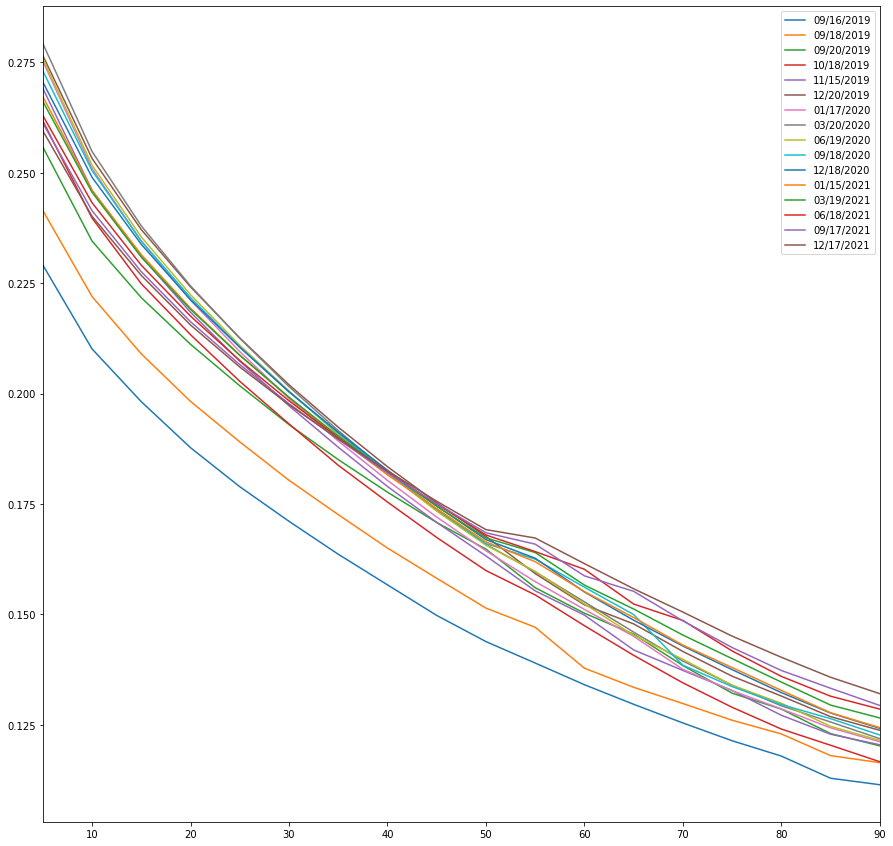

In [84]:
#nodediffy
#diffys
#comparisonframe
comparisonframe.plot(figsize = (15, 15))#.set_ylim(.28, .42)
#comparisonframe.plot(figsize = (15, 15),title = stkname+" Vols")#.set_ylim(.28, .42)
plt.show()

In [85]:
forwards

,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
Forward Vol,NaN,0.207555,0.263425,0.156037,0.168979,0.177131,0.150627,0.169121,0.165271,0.167185,0.170762,0.157386,0.174411,0.172049,0.172069,0.174981


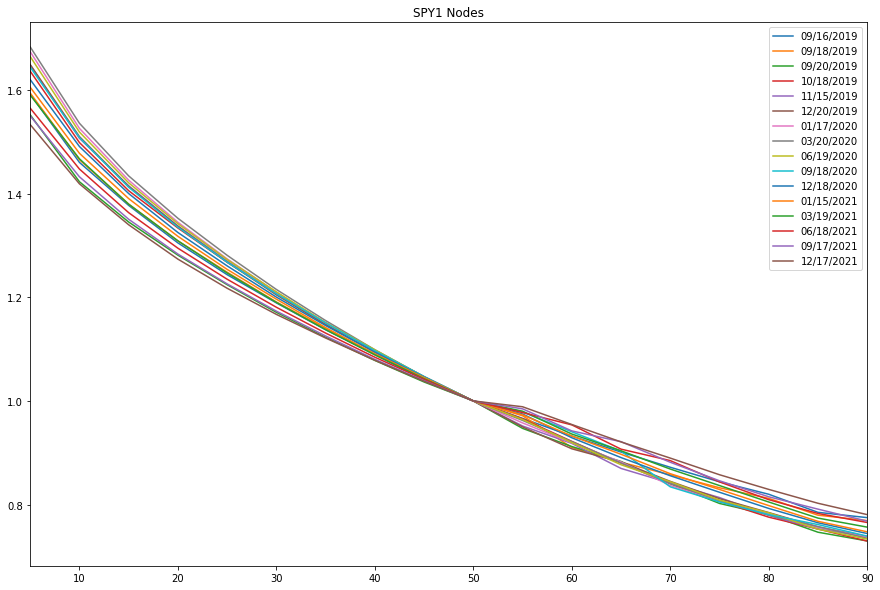

In [86]:
filtered = nodes
filtered.plot(figsize = (15,10), title = stkname+" Nodes")

#nodes.plot(figsize = (15,15))
plt.show()

In [87]:
forwards

,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
Forward Vol,NaN,0.207555,0.263425,0.156037,0.168979,0.177131,0.150627,0.169121,0.165271,0.167185,0.170762,0.157386,0.174411,0.172049,0.172069,0.174981


In [88]:
# nodes.index.name = stkname
# nodes

In [89]:
# comparisonframe.iloc[:, [5,6,7,8,9,10,11,12,13,14,23]]
comparisonframe

,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
5,0.229128,0.241462,0.255842,0.261779,0.269159,0.276562,0.275295,0.279288,0.275883,0.273074,0.270548,0.267262,0.266169,0.262978,0.261238,0.259505
10,0.210123,0.221978,0.23454,0.239746,0.246037,0.253256,0.25096,0.25483,0.251717,0.250496,0.248976,0.246025,0.245582,0.243222,0.241422,0.240148
15,0.198178,0.209009,0.221727,0.224878,0.231063,0.237135,0.234516,0.237974,0.235481,0.234557,0.233809,0.231468,0.230909,0.229074,0.227609,0.226769
20,0.187762,0.198247,0.211178,0.213353,0.218426,0.224169,0.221146,0.224394,0.222403,0.221736,0.221255,0.219342,0.219079,0.217544,0.216288,0.215542
25,0.178935,0.189085,0.201784,0.202792,0.207365,0.212607,0.209521,0.212541,0.210946,0.210562,0.210497,0.208728,0.208678,0.207486,0.206576,0.20603
30,0.1711,0.180384,0.192991,0.193141,0.197246,0.20201,0.198916,0.201596,0.2006,0.2004,0.200427,0.19914,0.199181,0.19839,0.197711,0.197491
35,0.163645,0.17261,0.185071,0.183791,0.18787,0.192411,0.18928,0.191633,0.190751,0.191082,0.191267,0.190011,0.190392,0.190014,0.189645,0.189774
40,0.15671,0.165043,0.17769,0.175465,0.17898,0.183467,0.180361,0.182291,0.182065,0.182142,0.18267,0.18161,0.182259,0.18219,0.182038,0.182504
45,0.149791,0.1582,0.170827,0.16744,0.170854,0.175306,0.172051,0.173654,0.173383,0.173879,0.174563,0.173951,0.174513,0.174982,0.175085,0.175643
50,0.143865,0.151444,0.164799,0.159951,0.163249,0.167672,0.164428,0.165891,0.1657,0.166051,0.16696,0.166444,0.167346,0.168004,0.168502,0.169215


In [90]:
[x for x in [forwards.iloc[0,:]]]

[09/16/2019         NaN
 09/18/2019    0.207555
 09/20/2019    0.263425
 10/18/2019    0.156037
 11/15/2019    0.168979
 12/20/2019    0.177131
 01/17/2020    0.150627
 03/20/2020    0.169121
 06/19/2020    0.165271
 09/18/2020    0.167185
 12/18/2020    0.170762
 01/15/2021    0.157386
 03/19/2021    0.174411
 06/18/2021    0.172049
 09/17/2021    0.172069
 12/17/2021    0.174981
 Name: Forward Vol, dtype: object]

In [91]:
#a[((a.iloc[:,0]=='07/29/2019') & ( (a.iloc[:,11]<=380) &(a.iloc[:,11]>=300) ) )].iloc[:, [6,7,8, 4,5,10, 11,21, 15,16,17,18,19]]
#a[a.iloc[:,0]=='07/19/2019'].iloc[:,[6,7,8,4,5,11,15,16,17,18]]
#[(x,y) for x,y in enumerate(list(a))]
a = pd.read_csv(fapth2, header = 2)



#Date and strike
#a[ ((a.iloc[:,11]<200) & (a.iloc[:,11]>175) & (a.iloc[:,0]=='01/17/2020'))].iloc[:, [0,6,7,8, 4,5,10, 11,21, 15,16,17,18,19] ]

#a[( ((a.iloc[:,0]==('07/29/2019')) | (a.iloc[:,0]==('08/05/2019') ) ) & ( (a.iloc[:,11]<=300) &(a.iloc[:,11]>=00) ) )].iloc[:, [0,6,7,8, 4,5,10, 11,21, 15,16,17,18,19]]

#Date
a[ a.iloc[:,0] == '01/17/2020'].iloc[:, [0,6,7,8, 4,5,10, 11,21, 15,16,17,18,19] ]

#Strike
#a[ a.iloc[:,11] == 130].iloc[:, [0,6,7,8, 4,5,10, 11,21, 15,16,17,18,19] ]


,Expiration Date,Vol,IV,Delta,Bid,Ask,Open Int,Strike,Open Int.1,Bid.1,Ask.1,Vol.1,IV.1,Delta.1
1865,01/17/2020,0,3.9353,0.9654,242.49,242.88,0,50.0,24,0.00,0.01,0,0.8346,-0.0001
1866,01/17/2020,0,3.1511,0.9544,232.50,232.89,0,60.0,102,0.00,0.01,0,0.7528,-0.0001
1867,01/17/2020,0,2.5915,0.9461,222.52,222.91,0,70.0,80,0.00,0.01,0,0.6898,-0.0002
1868,01/17/2020,0,2.1716,0.9404,212.53,212.92,0,80.0,262,0.00,0.01,0,0.6271,-0.0002
1869,01/17/2020,0,1.9989,0.9383,207.54,207.93,0,85.0,7670,0.00,0.01,0,0.5645,-0.0001
1870,01/17/2020,0,1.8455,0.9367,202.55,202.94,0,90.0,1554,0.00,0.01,0,0.5644,-0.0002
1871,01/17/2020,0,1.7079,0.9355,197.56,197.94,0,95.0,2329,0.00,0.01,0,0.5270,-0.0002
1872,01/17/2020,0,1.5841,0.9346,192.56,192.95,5,100.0,3856,0.01,0.02,0,0.5500,-0.0005
1873,01/17/2020,0,1.4722,0.9340,187.57,187.96,0,105.0,1221,0.01,0.02,0,0.5319,-0.0006
1874,01/17/2020,0,1.3708,0.9336,182.58,182.97,0,110.0,547,0.01,0.02,0,0.5026,-0.0005


In [92]:

a[((a.iloc[:,0]=='07/19/2019') & ( (a.iloc[:,11]<=380) &(a.iloc[:,11]>=300) ) )].iloc[:, [6,7,8, 4,5,11,15,16,17,18,19]]

a[(a.iloc[:,0]=='09/20/2019') ].iloc[:, [6,7,8, 4,5,11,15,16,17,18,19]]

for x in range(1, 50):
    fpathnum = x
    os.chdir("C:/Users/vaggarwal/Downloads")
    fpath = 'quotedata '+'('+str(fpathnum)+')'+'.dat'
    a = pd.read_csv(fpath, header = 2)

    stkname = a.iloc[1,1][0:(len([(letterz in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ')) for letterz in a.iloc[1,1]][0:4]))]
    print(x, stkname)
    

1 GM19
2 NFLX
3 SPY1
4 BABA
5 FB19
6 GM19
7 NFLX
8 BABA
9 EXPR
10 EPI1
11 WMT1
12 VNQ1
13 SRPT
14 SPY1
15 GM19
16 AAPL
17 AMD1
18 NVDA
19 JD19
20 IMUX
21 HZNP
22 UBER
23 NFLX
24 WMT1
25 GM19
26 NFLX
27 NUGT
28 GLD1
29 NFLX
30 SPY1
31 GM19
32 SPY1
33 BA19
34 GM19
35 MSFT
36 NFLX
37 HYG1
38 NFLX
39 HYG1
40 SPY1
41 EWU1
42 EWU1
43 DIS1
44 CTL1
45 SPY1
46 GM19
47 GM19
48 FB19
49 DIS1


In [93]:
[(x,y) for x,y in enumerate(list(a))]

forwardvol

,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
Volatility,0.143865,0.151444,0.164799,0.159951,0.163249,0.167672,0.164428,0.165891,0.1657,0.166051,0.16696,0.166444,0.167346,0.168004,0.168502,0.169215
Days,18,20,22,50,78,113,141,204,295,386,477,505,568,659,750,841
Years,0.0493151,0.0547945,0.060274,0.136986,0.213699,0.309589,0.386301,0.558904,0.808219,1.05753,1.30685,1.38356,1.55616,1.80548,2.05479,2.30411
Forward Vol,NaN,0.207555,0.263425,0.156037,0.168979,0.177131,0.150627,0.169121,0.165271,0.167185,0.170762,0.157386,0.174411,0.172049,0.172069,0.174981


In [94]:
from scipy.stats import norm
from scipy.optimize import root
import numpy as np

N = norm(0,1).cdf
n = norm(0,1).pdf
 
def bs(S, X, r, sigma, T):
    d1 = np.log(S/X)+(r+0.5*sigma*sigma)*T
    d1 = d1/sigma/np.sqrt(T+1E-10)
    d2 = d1 -sigma*np.sqrt(T)
    return S*N(d1) -X*np.exp(r*T)*N(d2) +X-S

print(bs(183,205,0.00,.3,(2/365)))

22.00000012533306


In [95]:
[(x,y) for x,y in enumerate(a.columns)]

[(0, 'Expiration Date'),
 (1, 'Calls'),
 (2, 'Last Sale'),
 (3, 'Net'),
 (4, 'Bid'),
 (5, 'Ask'),
 (6, 'Vol'),
 (7, 'IV'),
 (8, 'Delta'),
 (9, 'Gamma'),
 (10, 'Open Int'),
 (11, 'Strike'),
 (12, 'Puts'),
 (13, 'Last Sale.1'),
 (14, 'Net.1'),
 (15, 'Bid.1'),
 (16, 'Ask.1'),
 (17, 'Vol.1'),
 (18, 'IV.1'),
 (19, 'Delta.1'),
 (20, 'Gamma.1'),
 (21, 'Open Int.1')]

In [96]:
nodes

,09/16/2019,09/18/2019,09/20/2019,10/18/2019,11/15/2019,12/20/2019,01/17/2020,03/20/2020,06/19/2020,09/18/2020,12/18/2020,01/15/2021,03/19/2021,06/18/2021,09/17/2021,12/17/2021
5,1.59266,1.5944,1.55245,1.63662,1.64876,1.64943,1.67426,1.68356,1.66496,1.64452,1.62044,1.60572,1.59053,1.56531,1.55036,1.53358
10,1.46056,1.46574,1.42319,1.49887,1.50713,1.51043,1.52627,1.53612,1.51911,1.50855,1.49123,1.47813,1.46751,1.44772,1.43275,1.41919
15,1.37753,1.38011,1.34544,1.40592,1.4154,1.41428,1.42626,1.43452,1.42113,1.41256,1.40039,1.39067,1.37983,1.36351,1.35078,1.34013
20,1.30513,1.30905,1.28143,1.33387,1.33799,1.33695,1.34494,1.35266,1.3422,1.33535,1.32519,1.31781,1.30914,1.29488,1.28359,1.27377
25,1.24377,1.24855,1.22443,1.26783,1.27024,1.268,1.27425,1.2812,1.27306,1.26805,1.26076,1.25404,1.24698,1.23501,1.22596,1.21756
30,1.18931,1.1911,1.17107,1.2075,1.20825,1.2048,1.20975,1.21523,1.21062,1.20686,1.20045,1.19644,1.19023,1.18087,1.17335,1.1671
35,1.13749,1.13976,1.12301,1.14904,1.15082,1.14754,1.15115,1.15517,1.15118,1.15074,1.14559,1.14159,1.13772,1.13101,1.12547,1.12149
40,1.08929,1.08979,1.07823,1.09699,1.09636,1.09421,1.0969,1.09886,1.09876,1.09691,1.09409,1.09112,1.08911,1.08444,1.08033,1.07853
45,1.0412,1.04461,1.03658,1.04682,1.04658,1.04553,1.04636,1.04679,1.04637,1.04714,1.04554,1.0451,1.04282,1.04153,1.03907,1.03798
50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [97]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [111]:
nodes.columns = [x+1 for (x,y) in enumerate(nodes.columns)]

pd.to_numeric(nodes.columns, errors='coerce')
#pd.to_numeric(nodes.values, errors='coerce')
pd.to_numeric(nodes.index, errors='coerce')


Int64Index([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
            90],
           dtype='int64')

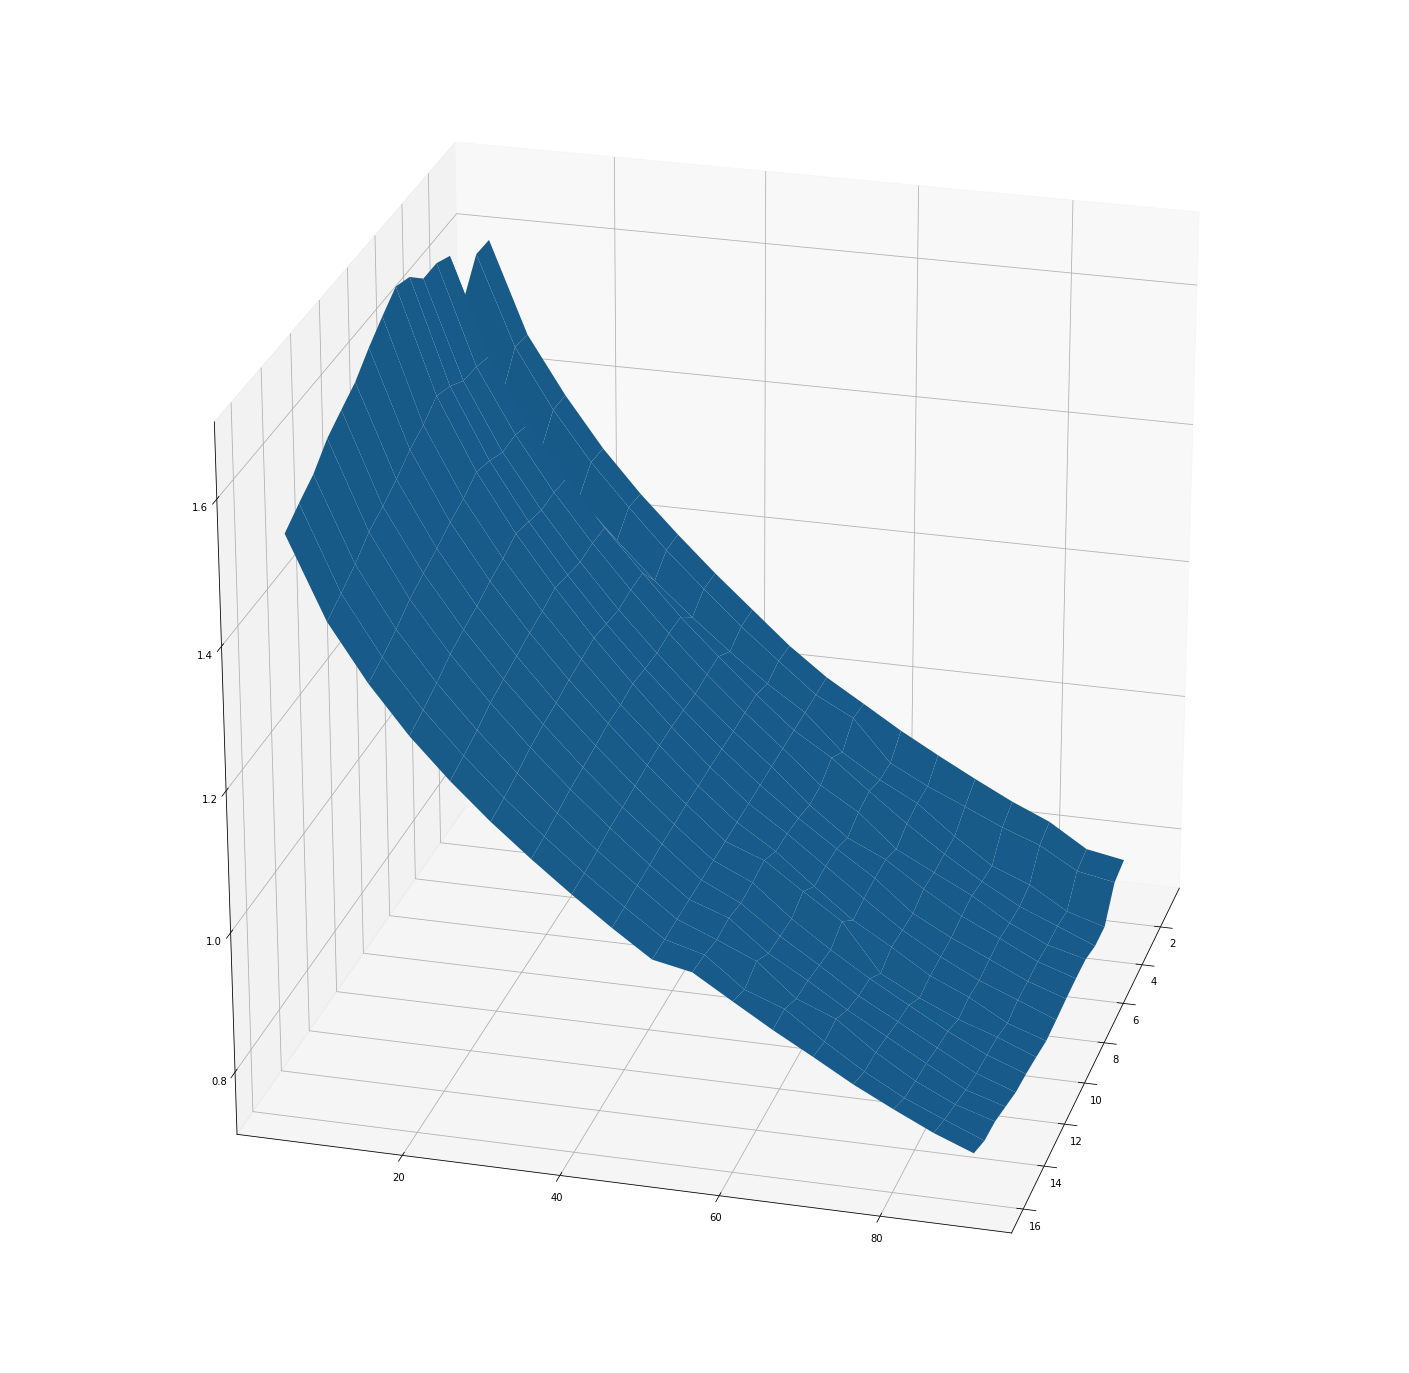

In [200]:
fig = plt.figure(figsize=(25,25))


Y = nodes.index

X = nodes.columns.values

X,Y = np.meshgrid(X,Y)

Z = nodes.values

Z_float = np.vstack(Z[:, :]).astype(np.float)


ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z_float)# cmap = "ocean")

ax.view_init(25, 15)


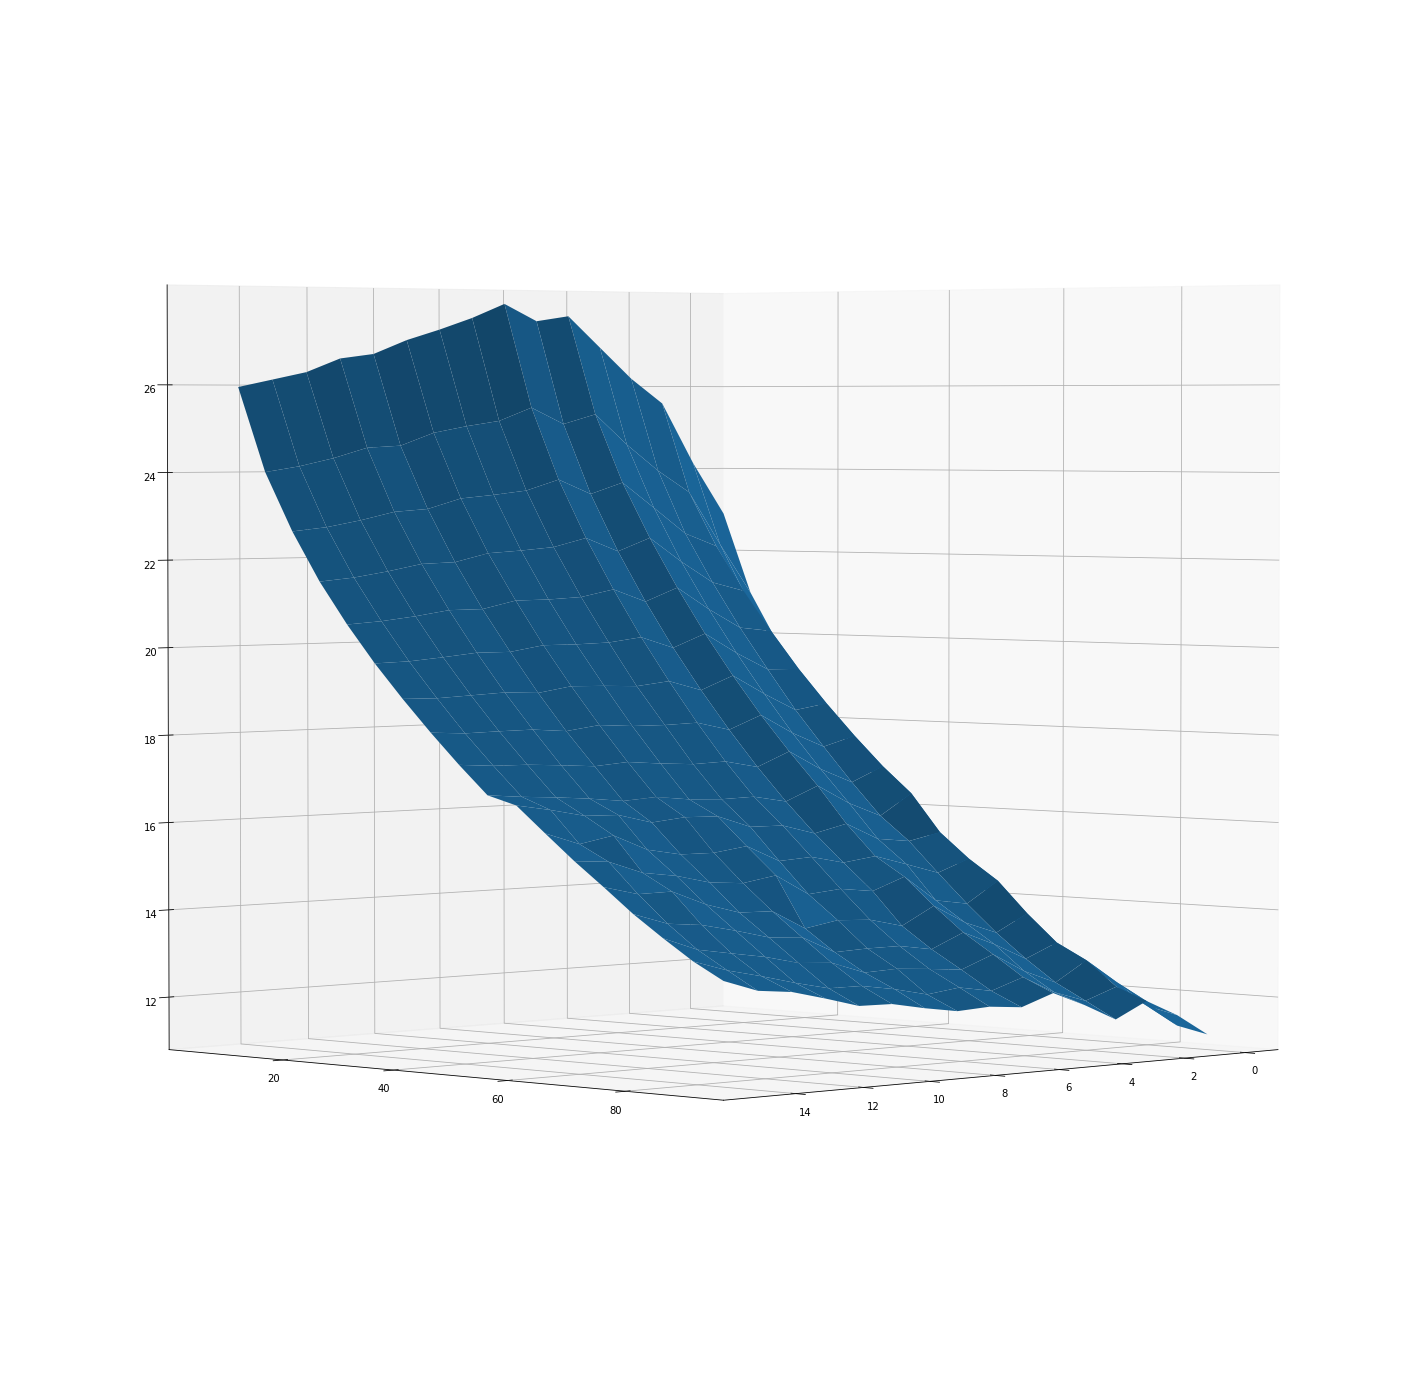

In [209]:
%matplotlib inline

fig2 = plt.figure(figsize = (25,25))
comparisonframe.columns = [float(x) for (x,y) in enumerate (comparisonframe.columns)]
comparisonframe.index = [float(x) for x in comparisonframe.index]

A = comparisonframe.columns
B = comparisonframe.index
C = comparisonframe.values*100

C_float = np.vstack(C[:, :]).astype(np.float)

A,B = np.meshgrid(A,B)


bx = plt.axes(projection='3d')

bx.plot_surface(A, B, C_float) #cmap = "Blues")

bx.view_init(2, 45)




In [136]:

ax.plot_surface(A,B,C_float)